In [10]:
import pandas as pd
import sqlite3
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import re
import plotly.express as px

import plotly.graph_objects as go
from ipywidgets import widgets

import chart_studio.plotly as py

import chart_studio
chart_studio.tools.set_credentials_file(username='ceverest', api_key='V6TM2axFVMohJrseeMna')

In [15]:
#Show all columns in dataframe by scrolling to the right
pd.options.display.max_columns = None
#Make each column accomodate full text
pd.set_option('display.max_colwidth', 0)
#Print up to 150 rows
pd.options.display.max_rows = 160

In [9]:
WHERE to_grouping NOT IN ('Managed Care Organizations',
                            'Nursing Service Providers',
                            'Physician Assistants & Advanced Practice Nursing Providers',
                            'Suppliers',
                            'Transportation Services',
                            'Managed Care Organizations',
                            'Dental Providers',
                            'Laboratories',
                            'Student, Health Care'
                            )
AND to_classification NOT IN ('Radiology',
                            'Pathology',
                             'Anesthesiology',
                             'Emergency Medecine',
                             'Obstetrics & Gynecology',
                             'Pediatrics'
                             'Clinical Pharmacology',
                             'Anesthesiologist Assistant')

SyntaxError: invalid syntax (<ipython-input-9-3621937d5cce>, line 1)

In [54]:
df = pd.DataFrame({"Date":["2020-01-27","2020-02-27","2020-03-27","2020-04-27", "2020-05-27", "2020-06-27", "2020-07-27",
                          "2020-01-27","2020-02-27","2020-03-27","2020-04-27", "2020-05-27", "2020-06-27", "2020-07-27"],
                   "A_item":[2, 8, 0, 1, 8, 10, 4, 7, 2, 15, 5, 12, 10, 7],
                   "B_item":[1, 7, 10, 6, 5, 9, 2, 5, 6, 1, 2, 6, 15, 8],
                   "C_item":[9, 2, 9, 3, 9, 18, 7, 2, 8, 1, 2, 8, 1, 3],
                   "Channel_type":["Chanel_1", "Chanel_1", "Chanel_1", "Chanel_1", "Chanel_1", "Chanel_1", "Chanel_1", 
                                   "Chanel_2", "Chanel_2", "Chanel_2", "Chanel_2", "Chanel_2", "Chanel_2", "Chanel_2"]
                   })

In [55]:
df

,Date,A_item,B_item,C_item,Channel_type
0,2020-01-27,2,1,9,Chanel_1
1,2020-02-27,8,7,2,Chanel_1
2,2020-03-27,0,10,9,Chanel_1
3,2020-04-27,1,6,3,Chanel_1
4,2020-05-27,8,5,9,Chanel_1
5,2020-06-27,10,9,18,Chanel_1
6,2020-07-27,4,2,7,Chanel_1
7,2020-01-27,7,5,2,Chanel_2
8,2020-02-27,2,6,8,Chanel_2
9,2020-03-27,15,1,1,Chanel_2


In [ ]:
cols =["A_item", "B_item", "C_item"]
chan1 = [list(df[item][:7])+[None]*7  for item in cols]
chan2 = [[None]*7 + list(df[item][7:])  for item in cols]

button1 =  dict(method = "restyle",
                args = [{'y': [ df["A_item"], df["B_item"], df["C_item"] ] }],
                label = "Channel 1 & Channel 2")
button2 =  dict(method = "restyle",
                args = [{'y': chan1}],
                label = "Channel 1")
button3 =  dict(method = "restyle",
                args = [{'y': chan2}],
                label = "Channel 2")
fig.update_layout(height=450,
                  updatemenus=[dict(active=0,
                                    buttons=[button1, button2, button3])
                              ]) 

### Drill down to key specialties identified by chronic conditions

#### Chronic Kidney Disease (ESRF)
'Urology Physician',
'Nephrology Physician',

#### Chronic Obstructive Pulmonary Disease / Asthma
'Pulmonary Disease Physician',
    
#### Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation
'Vascular Surgery Physician',
'Thoracic Surgery (Cardiothoracic Vascular Surgery) Physician',
'Interventional Cardiology Physician',
'Clinical Cardiac Electrophysiology Physician'

#### Osteoporosis 
'Orthopaedic Surgery of the Spine Physician',
'Orthopaedic Surgery Physician',

#### ?
'Gastroenterology Physician',

#### Diabetes
'Internal Medicine Physician',
'Family Medicine Physician',
Podiatry


In [246]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#assign selected sub-specialties with label for the associated chronic conditions

query = """
SELECT
     CASE WHEN from_display_name IN ('Urology Physician','Nephrology Physician') THEN 'Kidney Disease'
            
            WHEN from_display_name IN ('Pulmonary Disease Physician') THEN 'COPD & Asthma'
             
            WHEN from_display_name IN ('Vascular Surgery Physician',
                                        'Thoracic Surgery (Cardiothoracic Vascular Surgery) Physician',
                                        'Interventional Cardiology Physician',
                                        'Clinical Cardiac Electrophysiology Physician') THEN 'Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation'
           
            WHEN from_display_name IN ('Orthopaedic Surgery of the Spine Physician',
                                        'Orthopaedic Surgery Physician')   THEN 'Osteoporosis'
                                        
            WHEN from_display_name IN ('Gastroenterology Physician') THEN 'Other'
                                        
            WHEN from_display_name IN ('Internal Medicine Physician',
                                        'Family Medicine Physician') THEN 'Diabetes'                            
           
            ELSE from_display_name END
            
            AS medical_conditions
                                            
    , from_display_name
    , hospital_group
---    COUNT(DISTINCT(from_npi)) AS count_from_npi,
---    COUNT(DISTINCT(to_facility)) AS count_facilities,
    , SUM(patient_count) AS total_patients
---    SUM(transaction_count) AS total_transactions,
---    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_grouping NOT IN ('Managed Care Organizations',
                            'Nursing Service Providers',
                            'Suppliers',
                            'Transportation Services',
                            'Managed Care Organizations',
                            'Dental Providers',
                            'Laboratories',
                            'Physician Assistants & Advanced Practice Nursing Providers',
                            'Student, Health Care'
                            )
AND from_classification NOT IN ('Radiology',
                            'Pathology',
                             'Anesthesiology',
                           'Emergency Medicine',
                             'Obstetrics & Gynecology',
                             'Pediatrics',
                             'Clinical Pharmacology',
                             'Anesthesiologist Assistant')
                             
AND from_display_name IN (
                        ---'Urology Physician',
                        'Vascular Surgery Physician',
                         'Thoracic Surgery (Cardiothoracic Vascular Surgery) Physician',
                         'Pulmonary Disease Physician',
                         ---'Orthopaedic Surgery of the Spine Physician',
                        --- 'Orthopaedic Surgery Physician',
                        --- 'Nephrology Physician',
                         'Interventional Cardiology Physician',
                         ---'Internal Medicine Physician',
                         ---'Gastroenterology Physician',
                        --- 'Family Medicine Physician',
                       'Clinical Cardiac Electrophysiology Physician'
                        )

GROUP BY 
       --- from_classification 
 from_display_name
        , hospital_group
"""
#                            

cond_spec = pd.read_sql(query,db)

db.close()
cond_spec.shape

(39, 4)

In [246]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#assign selected sub-specialties with label for the associated chronic conditions

query = """
SELECT
     CASE WHEN from_display_name IN ('Urology Physician','Nephrology Physician') THEN 'Kidney Disease'
            
            WHEN from_display_name IN ('Pulmonary Disease Physician') THEN 'COPD & Asthma'
             
            WHEN from_display_name IN ('Vascular Surgery Physician',
                                        'Thoracic Surgery (Cardiothoracic Vascular Surgery) Physician',
                                        'Interventional Cardiology Physician',
                                        'Clinical Cardiac Electrophysiology Physician') THEN 'Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation'
           
            WHEN from_display_name IN ('Orthopaedic Surgery of the Spine Physician',
                                        'Orthopaedic Surgery Physician')   THEN 'Osteoporosis'
                                        
            WHEN from_display_name IN ('Gastroenterology Physician') THEN 'Other'
                                        
            WHEN from_display_name IN ('Internal Medicine Physician',
                                        'Family Medicine Physician') THEN 'Diabetes'                            
           
            ELSE from_display_name END
            
            AS medical_conditions
                                            
    , from_display_name
    , hospital_group
---    COUNT(DISTINCT(from_npi)) AS count_from_npi,
---    COUNT(DISTINCT(to_facility)) AS count_facilities,
    , SUM(patient_count) AS total_patients
---    SUM(transaction_count) AS total_transactions,
---    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_grouping NOT IN ('Managed Care Organizations',
                            'Nursing Service Providers',
                            'Suppliers',
                            'Transportation Services',
                            'Managed Care Organizations',
                            'Dental Providers',
                            'Laboratories',
                            'Physician Assistants & Advanced Practice Nursing Providers',
                            'Student, Health Care'
                            )
AND from_classification NOT IN ('Radiology',
                            'Pathology',
                             'Anesthesiology',
                           'Emergency Medicine',
                             'Obstetrics & Gynecology',
                             'Pediatrics',
                             'Clinical Pharmacology',
                             'Anesthesiologist Assistant')
                             
AND from_display_name IN (
                        ---'Urology Physician',
                        'Vascular Surgery Physician',
                         'Thoracic Surgery (Cardiothoracic Vascular Surgery) Physician',
                         'Pulmonary Disease Physician',
                         ---'Orthopaedic Surgery of the Spine Physician',
                        --- 'Orthopaedic Surgery Physician',
                        --- 'Nephrology Physician',
                         'Interventional Cardiology Physician',
                         ---'Internal Medicine Physician',
                         ---'Gastroenterology Physician',
                        --- 'Family Medicine Physician',
                       'Clinical Cardiac Electrophysiology Physician'
                        )

GROUP BY 
       --- from_classification 
 from_display_name
        , hospital_group
"""
#                            

cond_spec = pd.read_sql(query,db)

db.close()
cond_spec.shape

(39, 4)

In [247]:
cond_spec.head(2)

,medical_conditions,from_display_name,hospital_group,total_patients
0,Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation,Clinical Cardiac Electrophysiology Physician,Ascension Saint Thomas,5180
1,Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation,Clinical Cardiac Electrophysiology Physician,HCA,5820


In [244]:
df = cond_spec.rename(columns={"medical_conditions":"Chronic Conditions","hospital_group":"Hospital Group","total_patients":"Patient Volume","from_display_name":"NUCC Sub-Speciality"})
#cardiac_df = df[df['Chronic Conditions']=='Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation'].iloc[:,1:]
#diabetes_df = df[df['Chronic Conditions']=='Diabetes'].iloc[:,1:]
#renal_df = df[df['Chronic Conditions']=='Kidney Disease'].iloc[:,1:]
#osteo_df = df[df['Chronic Conditions']=='Osteoporosis'].iloc[:,1:]
#copd_df = df[df['Chronic Conditions']=='COPD & Asthma'].iloc[:,1:]
#other_df = df[df['Chronic Conditions']=='Other'].iloc[:,1:]

In [194]:
#cond_spec['hospital_group']=cond_spec['hospital_group'].str.replace(' Medical Center', '')

In [232]:
#df=cond_spec
df = cond_spec.rename(columns={"medical_conditions":"Chronic Conditions","hospital_group":"Hospital Group","total_patients":"Patient Volume","from_display_name":"NUCC Sub-Speciality"})

In [233]:
df

,Chronic Conditions,NUCC Sub-Speciality,Hospital Group,Patient Volume
0,Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation,Clinical Cardiac Electrophysiology Physician,Ascension Saint Thomas,5180
1,Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation,Clinical Cardiac Electrophysiology Physician,HCA,5820
2,Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation,Clinical Cardiac Electrophysiology Physician,Maury Regional Medical Center,104
3,Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation,Clinical Cardiac Electrophysiology Physician,NorthCrest Medical Center,72
4,Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation,Clinical Cardiac Electrophysiology Physician,Sumner Regional Medical Center,147
5,Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation,Clinical Cardiac Electrophysiology Physician,Vanderbilt University Medical Center,2874
6,Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation,Clinical Cardiac Electrophysiology Physician,Williamson Medical Center,357
7,Kidney Disease,Nephrology Physician,Ascension Saint Thomas,4933
8,Kidney Disease,Nephrology Physician,HCA,8102
9,Kidney Disease,Nephrology Physician,Macon County General Hospital,245


In [251]:
df = cond_spec.rename(columns={"medical_conditions":"Chronic Conditions",
                               "hospital_group":"Hospital Group",
                               "total_patients":"Patient Volume",
                               "from_display_name":"NUCC Sub-Speciality"})
fig = px.bar(df, 
             x='Patient Volume', 
             color='NUCC Sub-Speciality',
             y='Hospital Group',
            title='Sub-Specialities Associated with Key Cardiac & Respiratory Conditions')

fig.update_layout(legend=dict(
    orientation="h" ,
 yanchor="top" #,
    ##y=1.02,
   # xanchor="right",
  # x=1
))
#fig.update_xaxes(title='y', visible=False, showticklabels=False)
#fig.show()

py.iplot(fig, filename='chronic_condition_sub_specialties', auto_open=True)

In [94]:
df = cond_spec.rename(columns={"medical_conditions":"Chronic Conditions",
                               "hospital_group":"Hospital Group",
                               "total_patients":"Patient Volume",
                               "from_display_name":"NUCC Sub-Speciality"})
fig = px.bar(df, 
             x='Patient Volume', 
             color='Chronic Conditions',
             y='Hospital Group',
            title='Patient Volume by Sub-Specialities Associated with Key Chronic Conditions')

fig.update_layout(barmode='group')
fig.update_layout(legend=dict(
    orientation="h",
   ## yanchor="top",
    ##y=1.02,
    xanchor="right",
  # x=1
))
fig.show()

In [186]:
df = cond_spec.rename(columns={"medical_conditions":"Chronic Conditions",
                               "hospital_group":"Hospital Group",
                               "total_patients":"Patient Volume",
                               "from_display_name":"NUCC Sub-Speciality"})
fig = px.bar(df, 
             x='Patient Volume', 
             color='Chronic Conditions',
             y='Hospital Group',
            title='Patient Volume by Sub-Specialities Associated with Key Chronic Conditions')

fig.update_layout(barmode='stack')
fig.update_layout(legend=dict(
    orientation="h",
   ## yanchor="top",
    ##y=1.02,
    xanchor="right",
  # x=1
))
fig.show()



#fig = px.bar(df, x='Date', y=['A_item', 'B_item', 'C_item'])

#fig.update_layout(barmode='group')

#fig.show()

In [134]:
#subset by condition and select only relevant columns
#.iloc[:,-3:]

cardiac_df = df[df['Chronic Conditions']=='Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation'].iloc[:,1:]
diabetes_df = df[df['Chronic Conditions']=='Diabetes'].iloc[:,1:]
renal_df = df[df['Chronic Conditions']=='Kidney Disease'].iloc[:,1:]
osteo_df = df[df['Chronic Conditions']=='Osteoporosis'].iloc[:,1:]
copd_df = df[df['Chronic Conditions']=='COPD & Asthma'].iloc[:,1:]
other_df = df[df['Chronic Conditions']=='Other'].iloc[:,1:]

In [140]:
df_list = [cardiac_df, diabetes_df]

In [151]:
#df_list[0]
#['Hospital Group']

### Redo code so that 

## ALMOST THERE!!

In [252]:
#https://community.plotly.com/t/advanced-dropdown-menus-with-plotly/40922

cardiac_df = df[df['Chronic Conditions']=='Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation'].iloc[:,1:]
diabetes_df = df[df['Chronic Conditions']=='Diabetes'].iloc[:,1:]
renal_df = df[df['Chronic Conditions']=='Kidney Disease'].iloc[:,1:]
osteo_df = df[df['Chronic Conditions']=='Osteoporosis'].iloc[:,1:]
copd_df = df[df['Chronic Conditions']=='COPD & Asthma'].iloc[:,1:]
other_df = df[df['Chronic Conditions']=='Other'].iloc[:,1:]



#df1 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/solar.csv')
#df2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')    

# Name the list of dataframes

df_list=[cardiac_df, diabetes_df, renal_df, osteo_df, copd_df, other_df]

#fig = go.Figure(data=traces,
#                layout=dict(updatemenus=updatemenus))

#fig=px.bar(x=df_list[0]['Patient Volume']
#            , y=df_list[0]['Hospital Group']
#            , color= df_list[0]['NUCC Sub-Speciality']
#)
fig = go.Figure()
fig.add_bar(x=df_list[0]['Patient Volume']
            , y=df_list[0]['Hospital Group']
            #, color= df_list[0]['NUCC Sub-Speciality']
            #, barmode='stack'
           )
#fig.add_scatter(x=df2[cols2[0]], y=df2[cols2[1]], mode='lines', visible=False);

#The trace restyling  to be performed at an option selection in the first/second dropdown menu
# is defined within  buttons1/buttons2 below:

buttons1 = [dict(method = "update",
                 args = [{'x': [df_list[i]['Patient Volume'], 'undefined'],
                          'y': [df_list[i]['Hospital Group'], 'undefined'],
                          'color': [df_list[i]['NUCC Sub-Speciality']],
                          'visible':[True, True, False]}] , 
                 
                 label = ['Cardiac Conditions', 
                          'Diabetes', 
                          'Kidney Disease', 
                          'Osteoporosis', 
                          'COPD & Asthma', 
                          'Other'][i]
                )   for i in range(0, len(df_list))
           ]  

fig.update_layout(legend=dict(
    orientation="h",
   ## yanchor="top",
    ##y=1.02,
    xanchor="right",
  # x=1
))

fig.update_layout(title_text='Patient Volume by Sub-Specialities Associated with Key Chronic Conditions',
                  title_x=0.4,
                  width=850,
                  height=450,
                  updatemenus=[dict(show_active=True,
                                    buttons=buttons1,
                                    x=1.15,
                                    #y=1,
                                    xanchor='left',
                                    yanchor='bottom')                            
                               
                              ]); 

#Add annotations for the two dropdown menus:

#fig.add_annotation(
#            x=1.065,
#            y=1,
#            xref='paper',
#            yref='paper',
#            showarrow=False,
#            xanchor='left',
#            text="df1<br>State")
#;



fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Updatemenu: 'show_active'

    Valid properties:
        active
            Determines which button (by index starting from 0) is
            considered active.
        bgcolor
            Sets the background color of the update menu buttons.
        bordercolor
            Sets the color of the border enclosing the update menu.
        borderwidth
            Sets the width (in px) of the border enclosing the
            update menu.
        buttons
            A tuple of
            :class:`plotly.graph_objects.layout.updatemenu.Button`
            instances or dicts with compatible properties
        buttondefaults
            When used in a template (as
            layout.template.layout.updatemenu.buttondefaults), sets
            the default property values to use for elements of
            layout.updatemenu.buttons
        direction
            Determines the direction in which the buttons are laid
            out, whether in a dropdown menu or a row/column of
            buttons. For `left` and `up`, the buttons will still
            appear in left-to-right or top-to-bottom order
            respectively.
        font
            Sets the font of the update menu button text.
        name
            When used in a template, named items are created in the
            output figure in addition to any items the figure
            already has in this array. You can modify these items
            in the output figure by making your own item with
            `templateitemname` matching this `name` alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). Has no effect outside of a
            template.
        pad
            Sets the padding around the buttons or dropdown menu.
        showactive
            Highlights active dropdown item or active button if
            true.
        templateitemname
            Used to refer to a named item in this array in the
            template. Named items from the template will be created
            even without a matching item in the input figure, but
            you can modify one by making an item with
            `templateitemname` matching its `name`, alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). If there is no template or no
            matching item, this item will be hidden unless you
            explicitly show it with `visible: true`.
        type
            Determines whether the buttons are accessible via a
            dropdown menu or whether the buttons are stacked
            horizontally or vertically
        visible
            Determines whether or not the update menu is visible.
        x
            Sets the x position (in normalized coordinates) of the
            update menu.
        xanchor
            Sets the update menu's horizontal position anchor. This
            anchor binds the `x` position to the "left", "center"
            or "right" of the range selector.
        y
            Sets the y position (in normalized coordinates) of the
            update menu.
        yanchor
            Sets the update menu's vertical position anchor This
            anchor binds the `y` position to the "top", "middle" or
            "bottom" of the range selector.
        

In [253]:
#https://community.plotly.com/t/advanced-dropdown-menus-with-plotly/40922

cardiac_df = df[df['Chronic Conditions']=='Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation'].iloc[:,1:]
diabetes_df = df[df['Chronic Conditions']=='Diabetes'].iloc[:,1:]
renal_df = df[df['Chronic Conditions']=='Kidney Disease'].iloc[:,1:]
osteo_df = df[df['Chronic Conditions']=='Osteoporosis'].iloc[:,1:]
copd_df = df[df['Chronic Conditions']=='COPD & Asthma'].iloc[:,1:]
other_df = df[df['Chronic Conditions']=='Other'].iloc[:,1:]

#fig = go.Figure()

#fig.update_layout(
#    template="simple_white",
#    xaxis=dict(title_text="Patient Volume"),
#    yaxis=dict(title_text="Hospital Group"),
#    barmode="stack",
#)

#colors = ["#2A66DE", "#FFC32B"]

#for r, c in zip(df.response.unique(), colors):
#    plot_df = df[df.response == r]
#    fig.add_trace(
#        go.Bar(x=[plot_df.week, plot_df.layout], y=plot_df.cnt, name=r, marker_color=c),
#    )

#fig

#df1 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/solar.csv')
#df2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')    

# Name the list of dataframes

df_list=[cardiac_df, diabetes_df, renal_df, osteo_df, copd_df, other_df]

#fig = go.Figure(data=traces,
#                layout=dict(updatemenus=updatemenus))

fig=px.bar(x=df_list[1]['Patient Volume']
            , y=df_list[1]['Hospital Group']
            , color= df_list[1]['NUCC Sub-Speciality']
)

for k in [1,2]:
     fig.update_traces(visible=False, selector=k)
#fig = go.Figure()
#fig.add_bar(x=df_list[0]['Patient Volume']
#            , y=df_list[0]['Hospital Group']
            #, color= df_list[0]['NUCC Sub-Speciality']
            #, barmode='stack'
#           )
#fig.add_scatter(x=df2[cols2[0]], y=df2[cols2[1]], mode='lines', visible=False);

#The trace restyling  to be performed at an option selection in the first/second dropdown menu
# is defined within  buttons1/buttons2 below:

buttons1 = [dict(method = "update",
                 args = [{'x': [df_list[i]['Patient Volume'], 'undefined'],
                          'y': [df_list[i]['Hospital Group'], 'undefined'],
                          'color': [df_list[i]['NUCC Sub-Speciality'], 'undefined'],
                          'visible':[True, True, False]}] , 
                 
                 label = i #['Cardiac Conditions','Diabetes','Kidney Disease','Osteoporosis','COPD & Asthma','Other']
                )   for i in range(0, len(df_list))
           ]  

fig.update_layout(legend=dict(
    orientation="h",
   ## yanchor="top",
    ##y=1.02,
    xanchor="right",
  # x=1
))

fig.update_layout(title_text='Patient Volume by Sub-Specialities Associated with Key Chronic Conditions',
                  title_x=0.4,
                  width=850,
                  height=450,
                  updatemenus=[dict(active=0,
                                    buttons=buttons1,
                                    x=1.15,
                                    #y=1,
                                    xanchor='left',
                                    yanchor='bottom')                            
                               
                              ]); 

#Add annotations for the two dropdown menus:

#fig.add_annotation(
#            x=1.065,
#            y=1,
#            xref='paper',
#            yref='paper',
#            showarrow=False,
#            xanchor='left',
#            text="df1<br>State")
#;



fig.show()

ValueError: Cannot accept list of column references or list of columns for both `x` and `y`.

In [143]:
#https://community.plotly.com/t/advanced-dropdown-menus-with-plotly/40922

df1 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/solar.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')    

# Rename the lists of columns
cols1 = df1.columns
cols2 = df2.columns

fig = go.Figure()
fig.add_scatter(x=df1[cols1[0]], y=df1[cols1[1]], mode='lines')
fig.add_scatter(x=df2[cols2[0]], y=df2[cols2[1]], mode='lines', visible=False);

#The trace restyling  to be performed at an option selection in the first/second dropdown menu
# is defined within  buttons1/buttons2 below:

buttons1 = [dict(method = "restyle",
                 args = [{'x': [df1[cols1[0]], 'undefined'],
                          'y': [df1[cols1[k]], 'undefined'],
                          'visible':[True, False]}], 
                 label = cols1[k])   for k in range(1, len(cols1))]  

buttons2 = [dict(method = "restyle",
                 args = [{'x': ['undefined', df2[cols2[0]]],
                          'y': ['undefined', df2[cols2[k]]],
                          'visible':[False, True]}],
                 label = cols2[k])   for k in range(1, 7)]


fig.update_layout(title_text='Plot title',
                  title_x=0.4,
                  width=850,
                  height=450,
                 
                  updatemenus=[dict(active=0,
                                    buttons=buttons1,
                                    x=1.15,
                                    y=1,
                                    xanchor='left',
                                    yanchor='top'),
                              
                               dict(buttons=buttons2,
                                    x=1.15,
                                    y=0.85,
                                    xanchor='left',
                                    yanchor='top')
                              ]); 

#Add annotations for the two dropdown menus:

fig.add_annotation(
            x=1.065,
            y=1,
            xref='paper',
            yref='paper',
            showarrow=False,
            xanchor='left',
            text="df1<br>State")
fig.add_annotation(
            x=1.065,
            y=0.85,
            showarrow=False,
            xref='paper',
            yref='paper',
            xanchor='left',
            #yanchor='top',
            text="df2<br>Date");

fig.show()

In [135]:
print(cardiac_df.info())
print(diabetes_df.info())
print(renal_df.info())
print(osteo_df.info())
print(copd_df.info())
print(other_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 104
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUCC Sub-Speciality  28 non-null     object
 1   Hospital Group       28 non-null     object
 2   Patient Volume       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 896.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 7 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUCC Sub-Speciality  22 non-null     object
 1   Hospital Group       22 non-null     object
 2   Patient Volume       22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 45 to 99
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               -------

In [213]:
#cardiac_df = df[df['Chronic Conditions']=='Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation'].iloc[:,1:]
#diabetes_df = df[df['Chronic Conditions']=='Diabetes'].iloc[:,1:]
#renal_df = df[df['Chronic Conditions']=='Kidney Disease'].iloc[:,1:]

card_diab=pd.concat([cardiac_df, diabetes_df], ignore_index=True)


In [214]:
card_diab

,NUCC Sub-Speciality,Hospital Group,Patient Volume
0,Clinical Cardiac Electrophysiology Physician,Ascension Saint Thomas,5180
1,Clinical Cardiac Electrophysiology Physician,HCA,5820
2,Clinical Cardiac Electrophysiology Physician,Maury Regional Medical Center,104
3,Clinical Cardiac Electrophysiology Physician,NorthCrest Medical Center,72
4,Clinical Cardiac Electrophysiology Physician,Sumner Regional Medical Center,147
5,Clinical Cardiac Electrophysiology Physician,Vanderbilt University Medical Center,2874
6,Clinical Cardiac Electrophysiology Physician,Williamson Medical Center,357
7,Interventional Cardiology Physician,Ascension Saint Thomas,1441
8,Interventional Cardiology Physician,HCA,13896
9,Interventional Cardiology Physician,Macon County General Hospital,71


In [222]:
cond_spec.from_display_name.nunique()

12

In [224]:
#https://community.plotly.com/t/advanced-dropdown-menus-with-plotly/40922

cardiac_df = df[df['Chronic Conditions']=='Ischemic Heart Disease / Hyperlipidemia / Hypertension / Atrial Fibrillation'].iloc[:,1:]
#diabetes_df = df[df['Chronic Conditions']=='Diabetes'].iloc[:,1:]
renal_df = df[df['Chronic Conditions']=='Kidney Disease'].iloc[:,1:]
osteo_df = df[df['Chronic Conditions']=='Osteoporosis'].iloc[:,1:]
copd_df = df[df['Chronic Conditions']=='COPD & Asthma'].iloc[:,1:]
#other_df = df[df['Chronic Conditions']=='Other'].iloc[:,1:]

#fig = go.Figure()

#fig.update_layout(
#    template="simple_white",
#    xaxis=dict(title_text="Patient Volume"),
#    yaxis=dict(title_text="Hospital Group"),
#    barmode="stack",
#)

#colors = ["#2A66DE", "#FFC32B"]

#for r, c in zip(df.response.unique(), colors):
#    plot_df = df[df.response == r]
#    fig.add_trace(
#        go.Bar(x=[plot_df.week, plot_df.layout], y=plot_df.cnt, name=r, marker_color=c),
#    )

#fig

#df1 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/solar.csv')
#df2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')    

# Name the list of dataframes

df_list=[cardiac_df, renal_df, osteo_df, copd_df]

#fig = go.Figure(data=traces,
#                layout=dict(updatemenus=updatemenus))

fig=px.bar(x=df_list[0]['Patient Volume']
            , y=df_list[0]['Hospital Group']
            , color= df_list[0]['NUCC Sub-Speciality']
)
#fig = go.Figure()
#fig.add_bar(x=df_list[0]['Patient Volume']
#            , y=df_list[0]['Hospital Group']
            #, color= df_list[0]['NUCC Sub-Speciality']
            #, barmode='stack'
#           )
#fig.add_scatter(x=df2[cols2[0]], y=df2[cols2[1]], mode='lines', visible=False);

#The trace restyling  to be performed at an option selection in the first/second dropdown menu
# is defined within  buttons1/buttons2 below:

buttons1 = [dict(method = "update",
                 args = [{'x': [df_list[i]['Patient Volume'], 'undefined'],
                          'y': [df_list[i]['Hospital Group'], 'undefined'],
                          'marker_color': [df_list[i]['NUCC Sub-Speciality'], 'undefined'],
                          'visible':[True, True, True]}] , 
                 
                 label = i #['Cardiac Conditions','Diabetes','Kidney Disease','Osteoporosis','COPD & Asthma','Other']
                )   for i in range( len(df_list))
           ]  

fig.update_layout(legend=dict(
    orientation="h",
   ## yanchor="top",
    ##y=1.02,
    xanchor="right",
  # x=1
))

fig.update_layout(title_text='Patient Volume by Sub-Specialities Associated with Key Chronic Conditions',
                  title_x=0.4,
                  width=850,
                  height=450,
                  updatemenus=[dict(active=0,
                                    buttons=buttons1,
                                    x=1.15,
                                    #y=1,
                                    xanchor='left',
                                    yanchor='bottom')                            
                               
                              ]); 

#Add annotations for the two dropdown menus:

#fig.add_annotation(
#            x=1.065,
#            y=1,
#            xref='paper',
#            yref='paper',
#            showarrow=False,
#            xanchor='left',
#            text="df1<br>State")
#;



fig.show()

In [ ]:
https://community.plotly.com/t/combining-multiple-subplots-with-drop-down-menu-buttons/49513/2

In [59]:
df = sub_spec.rename(columns={"medical_conditions":"Chronic Conditions","hosptial_group":"Hospital Group",
                        "total_patients":"Patient Volume","from_display_name":"NUCC Sub-Speciality"})

In [60]:
df['Chronic Conditions'].unique().tolist()

['Heart Disease',
 'Diabetes',
 'HOW TO LABEL THIS ONE',
 'Kidney Disease',
 'Osteoporosis',
 'COPD & Asthma']

In [ ]:
df=sub_spec
fig = px.bar(df, 
             x='total_patients', 
             color='medical_conditions',
             y='hospital_group',
            title='Patient Volume by Sub-Specialities Associated with Key Chronic Conditions')

fig.update_layout(barmode='group')
fig.show()

In [ ]:
# Pull in dataframe. For readability, rename columns that will appear in the dropdown menu & populate the title.
df = sub_spec.rename(columns={"medical_conditions":"Chronic Conditions","hosptial_group":"Hospital Group",
                        "total_patients":"Patient Volume","from_display_name":"NUCC Sub-Speciality"})

# Create a list of column names for the dropdown menu
conditions_menu = df['Chronic Conditions'].unique().tolist()

# Assign this list to select which trace is visible in the plot
visible = np.array(mcd_menu_col)

# Define traces & widget buttons
traces = []
buttons = []
for value in mcd_menu_col:
    traces.append(go.Choropleth(
        locationmode = 'USA-states', # Specify that the plot should reference US states
        locations=df['code'], # Tell Plotly to use the state codes as location key
        z=df[value], # Z is the numeric data
        colorbar_title=value, #Setting the legend key to be the column name of whichever column the user selects
        visible= True if value==mcd_menu_col[0] else False))

    buttons.append(dict(label=value,
                        method="update",
                        args=[{"visible":list(visible==value)},
                              {"title":f"<b>{value}</b>"}]))

updatemenus = [{"active":0,
                "buttons":buttons}]

# Show figure
fig = go.Figure(data=traces,
                layout=dict(updatemenus=updatemenus))

default_title = mcd_menu_col[0] # This is in order to get the first title displayed correctly
fig.update_layout(title="<b>{default_title}<b>",
                  title_x=0.5, 
                  geo_scope='usa') #Specify that plot should only render the US, otherwise it defaults to world map
fig.show()

In [5]:
chronic = pd.read_excel(open('../data/County_Table_Chronic_Conditions_Spending/County_Table_Chronic_Conditions_Spending_2017.xlsx', 'rb'),
              sheet_name='Actual Spending')  
  

In [6]:
chronic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 24 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                 --------------  ----- 
 0   Chronic Conditions Medicare Spending State/County Table: Actual Per Capita Medicare Spending All Fee-for-Service Beneficiaries, 2017   3255 non-null   object
 1   Unnamed: 1                                                                                                                             3254 non-null   object
 2   Unnamed: 2                                                                                                                             3254 non-null   object
 3   Unnamed: 3                                                               

#### Clinical Cardiac Electrophysiology Physician
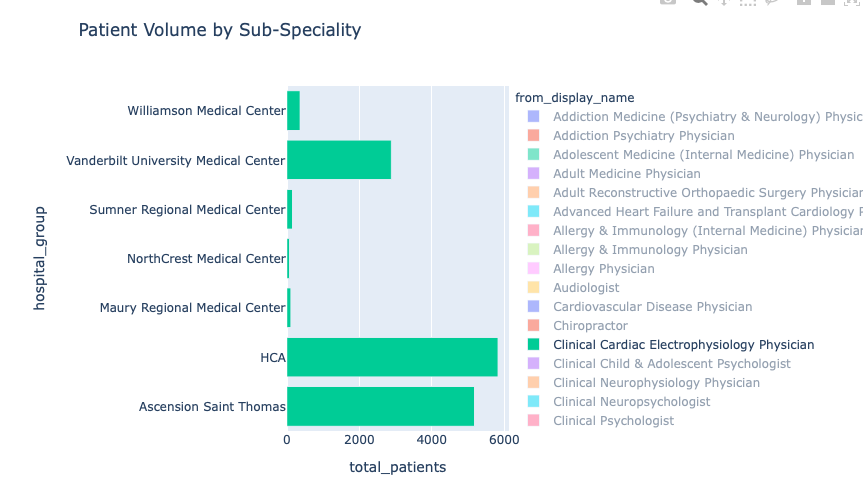

#### Family Medicine
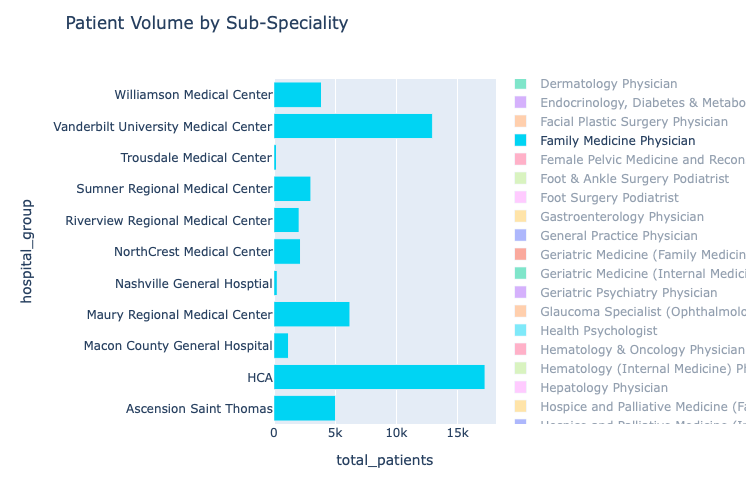

#### Gastroenterology
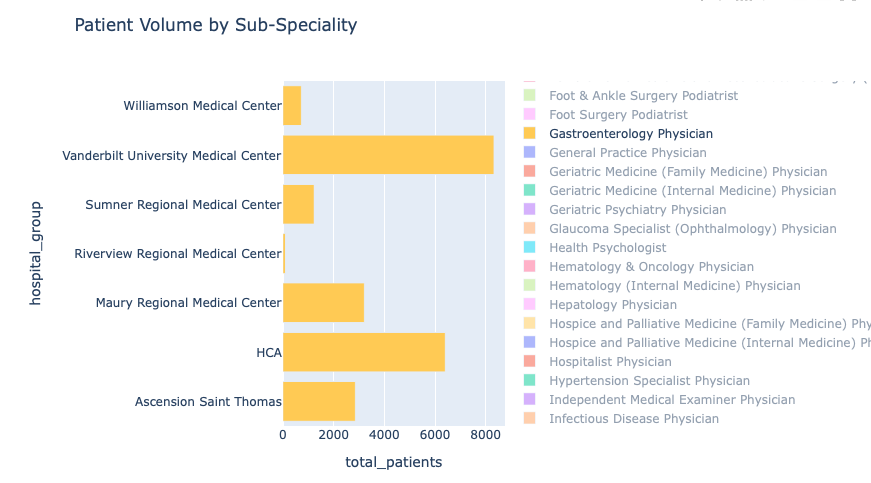

#### Internal Medicine

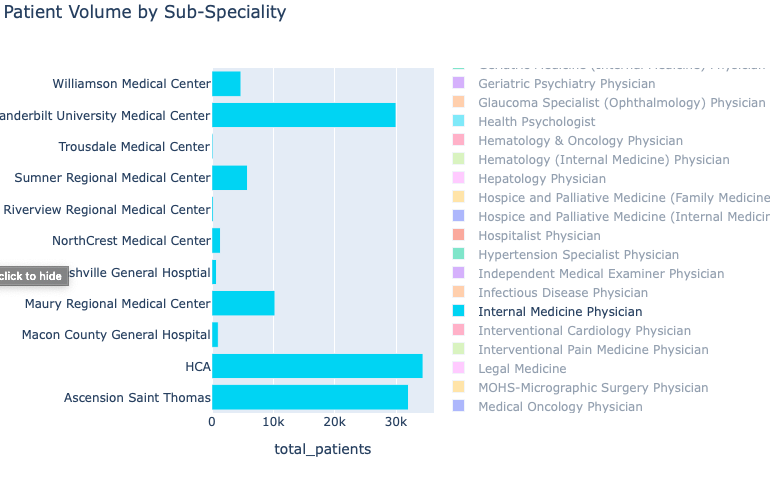


#### Interventional Cardiology

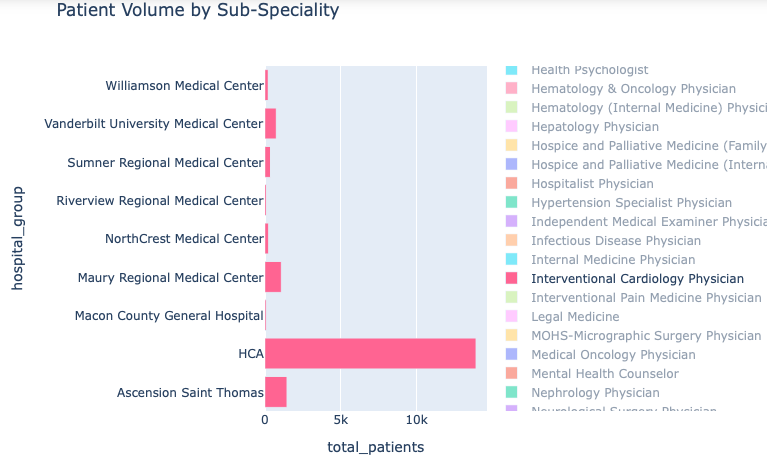

#### Nephrology

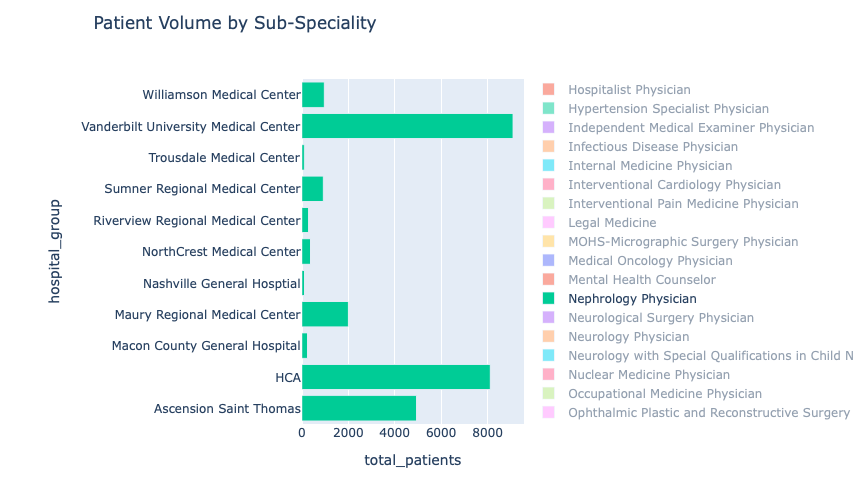

#### Orthopaedic Surgery

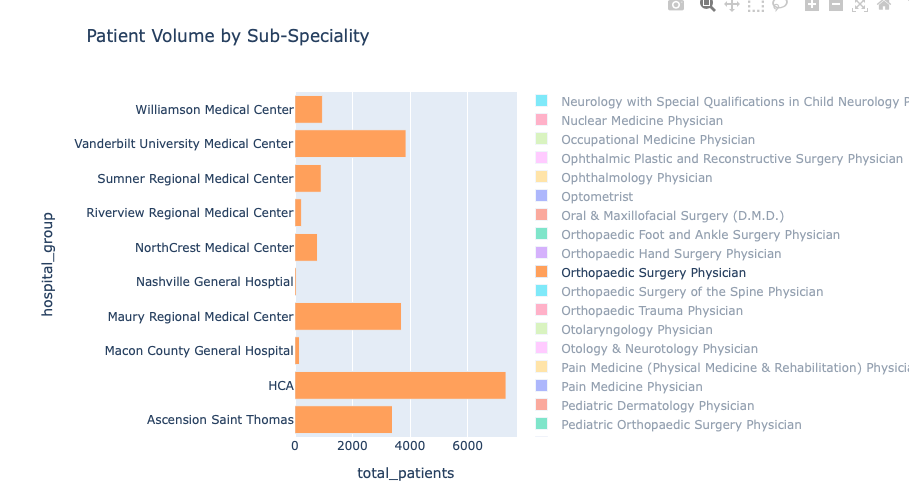

#### Orthopaedic Surgery of the Spine

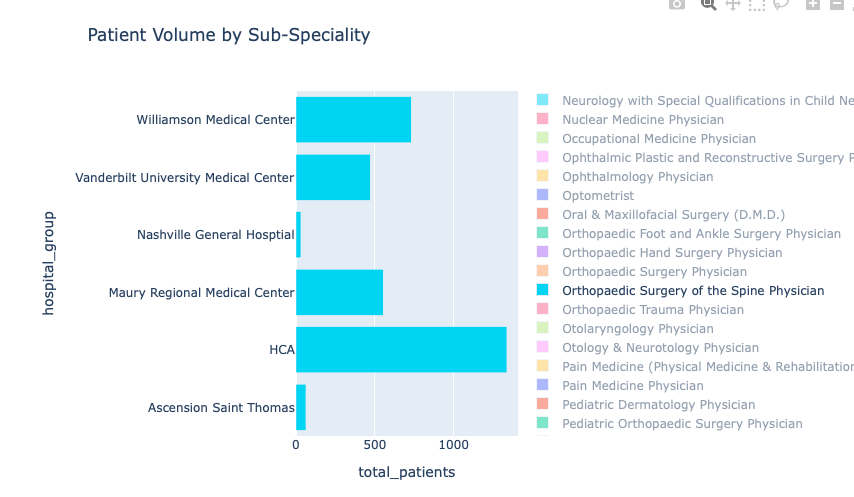

#### Pulmonary Disease

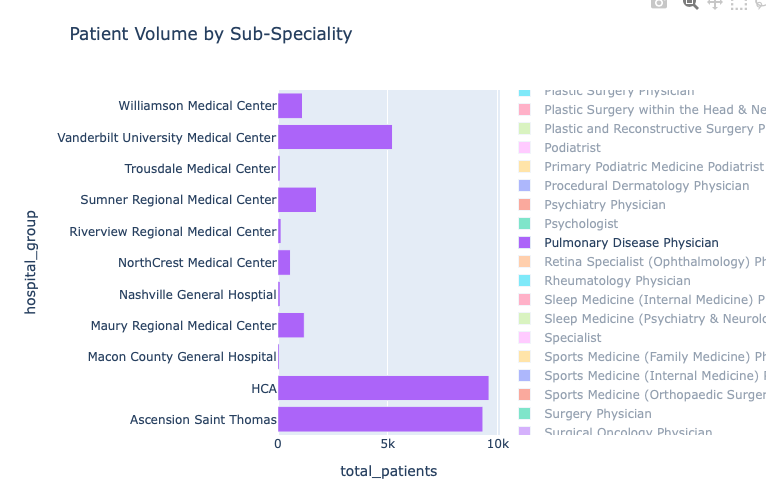

#### Cardiothorasic Surgery

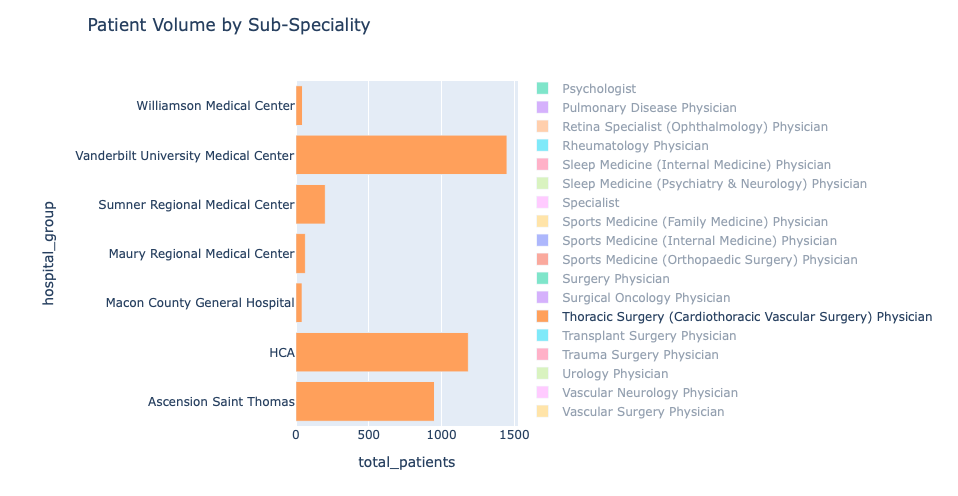

#### Vascular Surgery

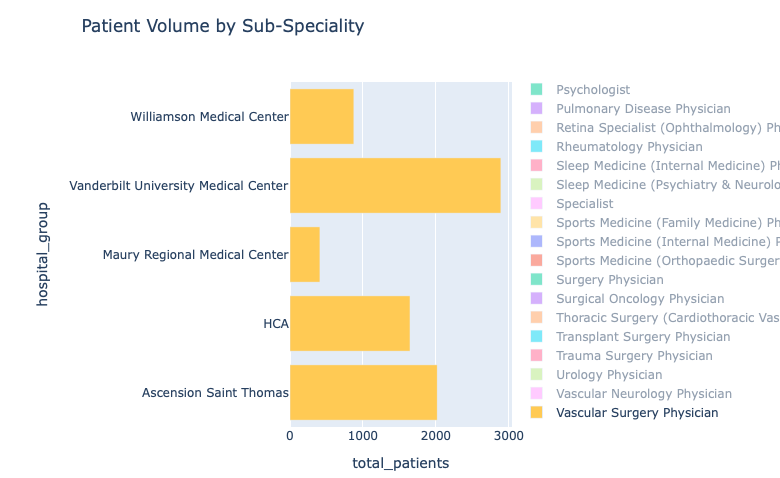

### Urology

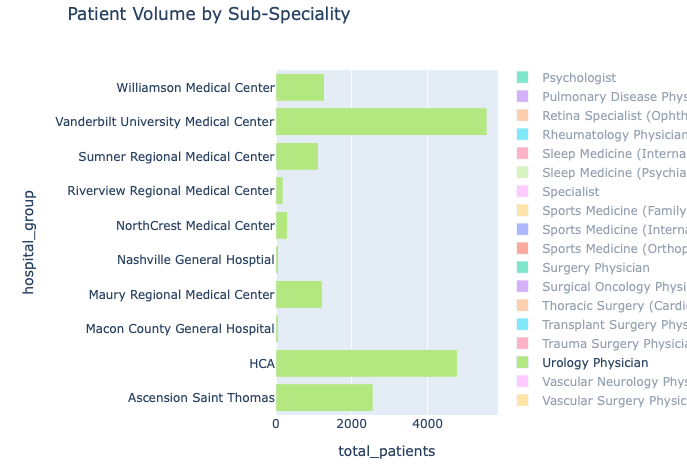

### Orthopedics & Podiatry

In [36]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_grouping,
    from_classification,
    from_display_name,
---    COUNT(DISTINCT(from_physician)) AS count_providers,
    COUNT(DISTINCT(from_npi)) AS count_npi,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions
FROM nash_referrals
---WHERE from_classification IN ('Internal Medicine','Hospitalist')
WHERE from_display_name IN ('Undersea and Hyperbaric Medicine (Emergency Medicine) Physician')
GROUP BY from_grouping,from_classification, from_specialization, from_display_name

"""

providers_agg = pd.read_sql(query,db)

db.close()
providers_agg.shape

(1, 6)

In [37]:
#providers_agg.count_npi.nunique()

In [38]:

providers_agg

,from_grouping,from_classification,from_display_name,count_npi,total_patients,total_transactions
0,Allopathic & Osteopathic Physicians,Emergency Medicine,Undersea and Hyperbaric Medicine (Emergency Medicine) Physician,1,330,884


In [26]:
df=ortho_pod
fig = px.bar(df, 
             x='total_patients', 
             color='from_classification',
             y='hospital_group',
            title='Patient Volume by Sub-Speciality in Orthopedic Surgery & Podiatry')
fig.show()

In [27]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_classification,
    from_display_name,
    hospital_group,
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(to_facility)) AS count_facilities,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_grouping NOT IN ('Managed Care Organizations',
                            'Nursing Service Providers',
                            'Suppliers',
                            'Transportation Services',
                            'Managed Care Organizations',
                            'Dental Providers',
                            'Laboratories',
                            'Physician Assistants & Advanced Practice Nursing Providers',
                            'Student, Health Care'
                            )
AND from_classification NOT IN ('Radiology',
                            'Pathology',
                             'Anesthesiology',
                           'Emergency Medicine',
                             'Obstetrics & Gynecology',
                             'Pediatrics',
                             'Clinical Pharmacology',
                             'Anesthesiologist Assistant')
AND from_display_name IN ('Adult Reconstructive Orthopaedic Surgery Physician',
                         'Orthopaedic Foot and Ankle Surgery Physician',
                         'Orthopaedic Hand Surgery Physician',
                         'Orthopaedic Surgery Physician',
                         'Orthopaedic Surgery of the Spine Physician',
                         'Orthopaedic Trauma Physician',
                            'Sports Medicine (Orthopaedic Surgery) Physician')
GROUP BY from_classification 
       , from_display_name
        , hospital_group
"""
#                            

ortho_pod = pd.read_sql(query,db)

db.close()
ortho_pod.shape

(36, 8)

In [29]:
df=ortho_pod
fig = px.bar(df, 
             x='total_patients', 
             color='from_display_name',
             y='hospital_group',
            title='Patient Volume by Sub-Speciality in Orthopedic Surgery')
fig.show()

### Diabetes - Pulmnoary Disease - Hypertension etc.

AND from_display_name IN ( 'Sleep Medicine (Psychiatry & Neurology) Physician',
                            'Pulmonary Disease Physician',
                            'Rheumatology Physician',
                            'Sleep Medicine (Internal Medicine) Physician',
                            'Hypertension Specialist Physician',
                            'Endocrinology, Diabetes & Metabolism Physician')

In [33]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_classification,
    from_display_name,
    hospital_group,
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(to_facility)) AS count_facilities,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_grouping NOT IN ('Managed Care Organizations',
                            'Nursing Service Providers',
                            'Suppliers',
                            'Transportation Services',
                            'Managed Care Organizations',
                            'Dental Providers',
                            'Laboratories',
                            'Physician Assistants & Advanced Practice Nursing Providers',
                            'Student, Health Care'
                            )
AND from_classification  IN ('Internal Medicine')

GROUP BY from_classification,from_display_name, hospital_group
"""
#                            

internal = pd.read_sql(query,db)

db.close()
internal.shape

(134, 8)

In [34]:
internal

,from_classification,from_display_name,hospital_group,count_from_npi,count_facilities,total_patients,total_transactions,trans_per_pt
0,Internal Medicine,Adolescent Medicine (Internal Medicine) Physician,NorthCrest Medical Center,1,1,220,260,1.18
1,Internal Medicine,Advanced Heart Failure and Transplant Cardiology Physician,Ascension Saint Thomas,5,3,3172,5669,1.79
2,Internal Medicine,Advanced Heart Failure and Transplant Cardiology Physician,HCA,2,2,2032,3109,1.53
3,Internal Medicine,Advanced Heart Failure and Transplant Cardiology Physician,Vanderbilt University Medical Center,5,1,2264,3136,1.39
4,Internal Medicine,Allergy & Immunology (Internal Medicine) Physician,Vanderbilt University Medical Center,1,1,43,53,1.23
5,Internal Medicine,Cardiovascular Disease Physician,Ascension Saint Thomas,44,4,27170,33441,1.23
6,Internal Medicine,Cardiovascular Disease Physician,HCA,27,8,22877,31593,1.38
7,Internal Medicine,Cardiovascular Disease Physician,Macon County General Hospital,7,1,1437,2425,1.69
8,Internal Medicine,Cardiovascular Disease Physician,Maury Regional Medical Center,10,1,4023,5397,1.34
9,Internal Medicine,Cardiovascular Disease Physician,Nashville General Hosptial,3,1,433,664,1.53


In [35]:
df=internal
fig = px.bar(df, 
             x='total_patients', 
             color='from_display_name',
             y='hospital_group',
            title='Patient Volume by Sub-Speciality in Orthopedic Surgery')
fig.show()

### Pulmonary Disease Specialists

In [16]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_classification,
    from_display_name,
    hospital_group,
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(to_facility)) AS count_facilities,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_grouping NOT IN ('Managed Care Organizations',
                            'Nursing Service Providers',
                            'Suppliers',
                            'Transportation Services',
                            'Managed Care Organizations',
                            'Dental Providers',
                            'Laboratories',
                            'Physician Assistants & Advanced Practice Nursing Providers',
                            'Student, Health Care'
                            )
AND from_classification NOT IN ('Radiology',
                            'Pathology',
                             'Anesthesiology',
                           'Emergency Medicine',
                             'Obstetrics & Gynecology',
                             'Pediatrics',
                             'Clinical Pharmacology',
                             'Anesthesiologist Assistant')
AND from_display_name IN ( 'Pulmonary Disease Physician')
GROUP BY from_classification,from_display_name, hospital_group
"""
#                            

pulmonary = pd.read_sql(query,db)

db.close()
pulmonary.shape

(11, 8)

In [17]:
pulmonary

,from_classification,from_display_name,hospital_group,count_from_npi,count_facilities,total_patients,total_transactions,trans_per_pt
0,Internal Medicine,Pulmonary Disease Physician,Ascension Saint Thomas,23,3,9310,11147,1.20
1,Internal Medicine,Pulmonary Disease Physician,HCA,22,8,9587,14306,1.49
2,Internal Medicine,Pulmonary Disease Physician,Macon County General Hospital,1,1,67,96,1.43
3,Internal Medicine,Pulmonary Disease Physician,Maury Regional Medical Center,2,1,1187,1923,1.62
4,Internal Medicine,Pulmonary Disease Physician,Nashville General Hosptial,2,1,91,209,2.30
5,Internal Medicine,Pulmonary Disease Physician,NorthCrest Medical Center,2,1,572,1056,1.85
6,Internal Medicine,Pulmonary Disease Physician,Riverview Regional Medical Center,2,1,133,197,1.48
7,Internal Medicine,Pulmonary Disease Physician,Sumner Regional Medical Center,3,1,1739,2773,1.59
8,Internal Medicine,Pulmonary Disease Physician,Trousdale Medical Center,2,1,91,119,1.31
9,Internal Medicine,Pulmonary Disease Physician,Vanderbilt University Medical Center,25,2,5206,9197,1.77


In [39]:
df=pulmonary
fig = px.bar(df, 
             x='total_patients', 
            # color='from_classification',
             y='hospital_group',
            title='Patient Volume by Sub-Speciality: Pulmonary Disease')
fig.show()

#py.iplot(fig, filename='patient_volume_pulmonology', auto_open=True)

#py.plot(data, filename = 'basic-line', auto_open=True)

### Internal Medicine - Family Practice - GP

In [191]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_classification,
    from_display_name,
    hospital_group,
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(to_facility)) AS count_facilities,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_grouping NOT IN ('Managed Care Organizations',
                            'Nursing Service Providers',
                            'Suppliers',
                            'Transportation Services',
                            'Managed Care Organizations',
                            'Dental Providers',
                            'Laboratories',
                            'Physician Assistants & Advanced Practice Nursing Providers',
                            'Student, Health Care'
                            )
AND from_classification NOT IN ('Radiology',
                            'Pathology',
                             'Anesthesiology',
                           'Emergency Medicine',
                             'Obstetrics & Gynecology',
                             'Pediatrics',
                             'Clinical Pharmacology',
                             'Anesthesiologist Assistant')
AND from_classification IN ('Family Medicine')
GROUP BY from_classification,from_display_name, hospital_group
"""
#    'Internal Medicine', 'General Practice'                        

general = pd.read_sql(query,db)

db.close()
general.shape

(28, 8)

In [192]:
general

,from_classification,from_display_name,hospital_group,count_from_npi,count_facilities,total_patients,total_transactions,trans_per_pt
0,Family Medicine,Adult Medicine Physician,Ascension Saint Thomas,1,1,75,105,1.40
1,Family Medicine,Adult Medicine Physician,HCA,1,1,118,199,1.69
2,Family Medicine,Adult Medicine Physician,Maury Regional Medical Center,1,1,335,376,1.12
3,Family Medicine,Adult Medicine Physician,Sumner Regional Medical Center,1,1,45,62,1.38
4,Family Medicine,Adult Medicine Physician,Vanderbilt University Medical Center,1,1,31,68,2.19
5,Family Medicine,Family Medicine Physician,Ascension Saint Thomas,48,4,5016,7369,1.47
6,Family Medicine,Family Medicine Physician,HCA,107,8,17211,30857,1.79
7,Family Medicine,Family Medicine Physician,Macon County General Hospital,6,1,1184,2248,1.90
8,Family Medicine,Family Medicine Physician,Maury Regional Medical Center,20,1,6187,10704,1.73
9,Family Medicine,Family Medicine Physician,Nashville General Hosptial,3,1,248,339,1.37


In [194]:
df=general
fig = px.bar(df, 
             x='total_patients', 
             color='from_display_name',
             y='hospital_group',
            title='Patient Volume by Sub-Speciality in Family Medicine & Hospital Group')
fig.show()

In [189]:
general[general['from_classification']=='Internal Medicine']

,from_classification,from_display_name,hospital_group,count_from_npi,count_facilities,total_patients,total_transactions,trans_per_pt
37,Internal Medicine,Adolescent Medicine (Internal Medicine) Physician,NorthCrest Medical Center,1,1,220,260,1.18
38,Internal Medicine,Advanced Heart Failure and Transplant Cardiology Physician,Ascension Saint Thomas,5,3,3172,5669,1.79
39,Internal Medicine,Advanced Heart Failure and Transplant Cardiology Physician,HCA,2,2,2032,3109,1.53
40,Internal Medicine,Advanced Heart Failure and Transplant Cardiology Physician,Vanderbilt University Medical Center,5,1,2264,3136,1.39
41,Internal Medicine,Allergy & Immunology (Internal Medicine) Physician,Vanderbilt University Medical Center,1,1,43,53,1.23
42,Internal Medicine,Cardiovascular Disease Physician,Ascension Saint Thomas,44,4,27170,33441,1.23
43,Internal Medicine,Cardiovascular Disease Physician,HCA,27,8,22877,31593,1.38
44,Internal Medicine,Cardiovascular Disease Physician,Macon County General Hospital,7,1,1437,2425,1.69
45,Internal Medicine,Cardiovascular Disease Physician,Maury Regional Medical Center,10,1,4023,5397,1.34
46,Internal Medicine,Cardiovascular Disease Physician,Nashville General Hosptial,3,1,433,664,1.53


### Filtering for physicians who do don't refer externally

In [ ]:

query = """
WITH CTE AS (SELECT 
	from_npi
FROM filtered_hop 
WHERE  to_facility_group LIKE '%Vanderbilt%' --- 
)
SELECT 
	from_npi,
	Provider_Last_Name,
	Provider_First_Name,
	COUNT(DISTINCT to_facility_group) AS Group_Count,
	SUM(patient_count) AS Total_referrals,
    GROUP_CONCAT(DISTINCT to_facility_group) AS Groups
FROM filtered_hop 
JOIN npidata ON NPI = from_npi
JOIN CBSA ON Zip = Address_Postal_Codes
WHERE from_npi NOT IN (
	SELECT from_npi
	FROM CTE)
GROUP BY from_npi, Provider_Last_Name, Provider_First_Name
HAVING COUNT(DISTINCT to_facility_group) > 1
"""

In [ ]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_classification,
    hospital_group,
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(to_facility)) AS count_facilities,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_grouping NOT IN ('Managed Care Organizations',
                            'Nursing Service Providers',
                            'Suppliers',
                            'Transportation Services',
                            'Managed Care Organizations',
                            'Dental Providers',
                            'Laboratories',
                            'Student, Health Care'
                            )
AND from_classification NOT IN ('Radiology',
                            'Pathology',
                             'Anesthesiology',
                           'Emergency Medicine',
                             'Obstetrics & Gynecology',
                             'Pediatrics',
                             'Clinical Pharmacology',
                             'Anesthesiologist Assistant')
AND from_display_name IN ('Adult Reconstructive Orthopaedic Surgery Physician',
                         'Orthopaedic Foot and Ankle Surgery Physician',
                         'Orthopaedic Hand Surgery Physician',
                         'Orthopaedic Surgery Physician',
                         'Orthopaedic Surgery of the Spine Physician',
                         'Orthopaedic Trauma Physician',
                            'Sports Medicine (Orthopaedic Surgery) Physician',
                            'Foot & Ankle Surgery Podiatrist',
                         'Foot Surgery Podiatrist',
                         'Podiatrist',
                         'Primary Podiatric Medicine Podiatrist')
GROUP BY from_classification, hospital_group
"""
#                            

ortho_pod = pd.read_sql(query,db)

db.close()
ortho_pod.shape

### Radiologist Locations

In [225]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_display_name,
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(hospital_group)) AS count_hospital_groups,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_classification IN ('Radiology')

GROUP BY from_display_name
"""
#                            

radio = pd.read_sql(query,db)

db.close()
radio.shape

(7, 6)

In [226]:
radio

,from_display_name,count_from_npi,count_hospital_groups,total_patients,total_transactions,trans_per_pt
0,Diagnostic Radiology Physician,190,11,343407,372253,1.08
1,Neuroradiology Physician,6,2,5669,6056,1.07
2,Nuclear Radiology Physician,1,1,467,475,1.02
3,Pediatric Radiology Physician,1,2,1142,1193,1.04
4,Radiation Oncology Physician,21,6,3869,8795,2.27
5,Therapeutic Radiology Physician,1,1,207,462,2.23
6,Vascular & Interventional Radiology Physician,8,4,7226,7903,1.09


In [223]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(hospital_group)) AS hospital_groups,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_classification IN ('Radiology')
AND from_display_name IN ('Diagnostic Radiology Physician')
"""
#                            

radio = pd.read_sql(query,db)

db.close()
radio.shape

(1, 5)

In [224]:
radio

,count_from_npi,hospital_groups,total_patients,total_transactions,trans_per_pt
0,190,11,343407,372253,1.08


In [ ]:
conditions = pd.read_csv('../data/County_Table_Chronic_Conditions_Spending/County_Table_Chronic_Conditions_Spending_2017.xlsx')